In [1]:
#find all shares that are included in DJI
#download time series
#build a correlation matrix
#find the biggest clique
#visualize data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [3]:
path='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
DJI=pd.read_html(path)[0][['Symbol', 'Company Name']]
ticker_dji=DJI['Symbol'].values
ticker_dji

array(['AXP', 'MMM', 'IBM', 'PFE', 'HD', 'PG', 'TRV', 'CSCO', 'JPM',
       'CAT', 'V', 'DIS', 'INTC', 'AAPL', 'MRK', 'WMT', 'BA', 'VZ', 'XOM',
       'CVX', 'JNJ', 'UNH', 'GS', 'KO', 'NKE', 'MCD', 'WBA', 'UTX',
       'DWDP', 'MSFT'], dtype=object)

In [4]:
start_time=datetime.datetime(2018,1,1)
finish_time=datetime.datetime(2018,12,31)
web_archiv={ }
for i in ticker_dji:
    web_archiv[i]=web.DataReader(i, 'yahoo', start_time, finish_time)['Close']

In [5]:
pd.DataFrame(web_archiv).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 30 columns):
AXP     251 non-null float64
MMM     251 non-null float64
IBM     251 non-null float64
PFE     251 non-null float64
HD      251 non-null float64
PG      251 non-null float64
TRV     251 non-null float64
CSCO    251 non-null float64
JPM     251 non-null float64
CAT     251 non-null float64
V       251 non-null float64
DIS     251 non-null float64
INTC    251 non-null float64
AAPL    251 non-null float64
MRK     251 non-null float64
WMT     251 non-null float64
BA      251 non-null float64
VZ      251 non-null float64
XOM     251 non-null float64
CVX     251 non-null float64
JNJ     251 non-null float64
UNH     251 non-null float64
GS      251 non-null float64
KO      251 non-null float64
NKE     251 non-null float64
MCD     251 non-null float64
WBA     251 non-null float64
UTX     251 non-null float64
DWDP    251 non-null float64
MSFT    251 non-null float64
dtypes

In [6]:
#Посчитаем корреляцию между сами рядами, потому что это будет отражать их связь
df=pd.DataFrame(web_archiv)
df_corr=df.corr()
df_corr

,AXP,MMM,IBM,PFE,HD,PG,TRV,CSCO,JPM,CAT,...,JNJ,UNH,GS,KO,NKE,MCD,WBA,UTX,DWDP,MSFT
AXP,1.000000,-0.256874,-0.331607,0.771950,0.365324,0.434180,-0.299354,0.732914,0.211279,-0.250760,...,0.593047,0.855277,-0.373863,0.573754,0.699962,0.437748,0.559156,0.403962,-0.182692,0.804152
MMM,-0.256874,1.000000,0.784041,-0.388560,0.196773,0.072385,0.867460,-0.300077,0.560608,0.771069,...,0.295656,-0.517121,0.749097,-0.058147,-0.486824,-0.103869,0.117751,0.500863,0.742761,-0.539956
IBM,-0.331607,0.784041,1.000000,-0.595601,0.488426,-0.424489,0.762554,-0.311918,0.662391,0.879756,...,-0.106433,-0.539135,0.887689,-0.489982,-0.284941,-0.555974,-0.372021,0.593535,0.899089,-0.466139
PFE,0.771950,-0.388560,-0.595601,1.000000,0.027550,0.661159,-0.465911,0.676363,-0.115536,-0.579761,...,0.649234,0.844328,-0.643945,0.768840,0.666200,0.554076,0.674719,0.115159,-0.564736,0.824287
HD,0.365324,0.196773,0.488426,0.027550,1.000000,-0.167008,0.128975,0.144994,0.541983,0.419531,...,0.060362,0.313376,0.318903,-0.073480,0.554729,-0.293862,-0.156883,0.745029,0.631946,0.345553
PG,0.434180,0.072385,-0.424489,0.661159,-0.167008,1.000000,-0.184328,0.134253,-0.239530,-0.379532,...,0.818448,0.425402,-0.460245,0.919201,0.117180,0.806504,0.855061,0.013628,-0.339414,0.267523
TRV,-0.299354,0.867460,0.762554,-0.465911,0.128975,-0.184328,1.000000,-0.203243,0.681348,0.730753,...,0.118876,-0.529804,0.836837,-0.214731,-0.457859,-0.233765,-0.025983,0.453363,0.690326,-0.524832
CSCO,0.732914,-0.300077,-0.311918,0.676363,0.144994,0.134253,-0.203243,1.000000,0.209697,-0.257017,...,0.334010,0.679462,-0.295230,0.278817,0.628269,0.202528,0.331832,0.204713,-0.300422,0.753173
JPM,0.211279,0.560608,0.662391,-0.115536,0.541983,-0.239530,0.681348,0.209697,1.000000,0.578732,...,0.178273,-0.033250,0.724374,-0.145233,0.160017,-0.372887,-0.051004,0.807646,0.703468,0.069216
CAT,-0.250760,0.771069,0.879756,-0.579761,0.419531,-0.379532,0.730753,-0.257017,0.578732,1.000000,...,-0.090734,-0.516431,0.775594,-0.457273,-0.356743,-0.355318,-0.281293,0.490231,0.845875,-0.498068


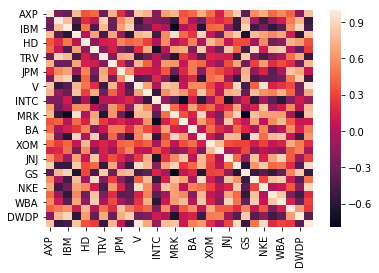

In [7]:
sns.heatmap(df_corr)

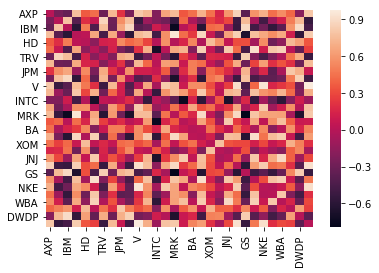

In [8]:
df1=df_corr.replace(1,0)
sns.heatmap(df1)

C:\Users\Yana\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


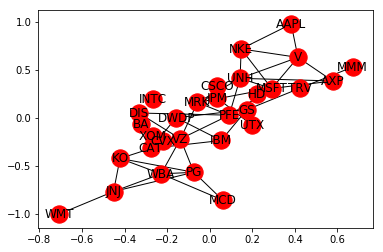

In [9]:
df2=(abs(df1)>0.8).astype(int)
m=df2.values
n=ticker_dji
G=nx.from_numpy_matrix(m)
nodes=dict(zip(G.nodes(),n))
G1=nx.relabel_nodes(G, nodes)
nx.draw_networkx(G1, pos= nx.kamada_kawai_layout(G1))

In [10]:
cliques=list(nx.find_cliques(G1))
sorted_cliques=sorted(cliques, key=len, reverse=True)

In [11]:
all_max_cliques=sorted_cliques[:5]
a=list()
for i in all_max_cliques:
    a.append(DJI[DJI['Symbol'].isin(i)]['Company Name'].values)
a

[array(['Pfizer Inc.', 'Merck & Co., Inc.',
        'UnitedHealth Group Incorporated', 'Microsoft Corporation'],
       dtype=object), array(['American Express Company', 'Visa Inc.',
        'UnitedHealth Group Incorporated', 'Microsoft Corporation'],
       dtype=object), array(['Visa Inc.', 'UnitedHealth Group Incorporated', 'NIKE, Inc.',
        'Microsoft Corporation'], dtype=object), array(['The Procter & Gamble Company', 'Verizon Communications Inc.',
        'The Coca-Cola Company', 'Walgreens Boots Alliance, Inc.'],
       dtype=object), array(['The Procter & Gamble Company', 'Johnson & Johnson',
        'The Coca-Cola Company', 'Walgreens Boots Alliance, Inc.'],
       dtype=object)]

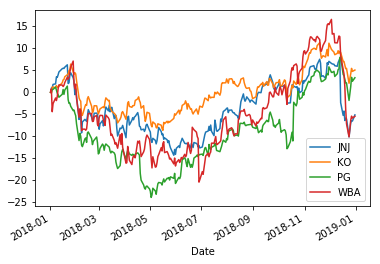

In [12]:
df_pct_0=(df/df.shift(1)-1).fillna(0)
df_pct_sum_0=(df_pct_0*100).cumsum()

#графики для первой из максимальных клик
df_pct_sum_0[['JNJ', 'KO', 'PG', 'WBA']].plot()

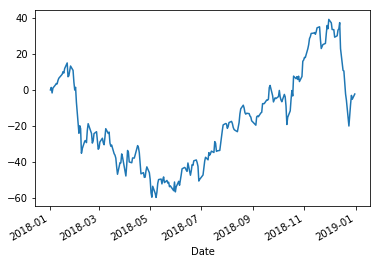

In [13]:
df_pct_sum_0[['JNJ', 'KO', 'PG', 'WBA']].sum(axis=1).plot()

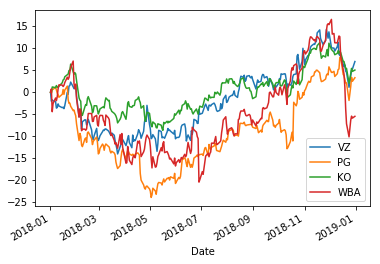

In [14]:
#графики для второй из максимальных клик
df_pct_sum_0[['VZ', 'PG', 'KO', 'WBA']].plot()

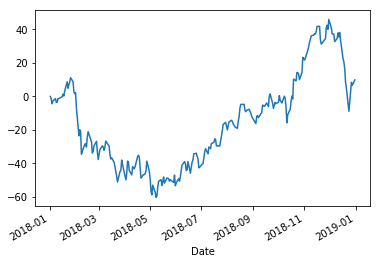

In [15]:
df_pct_sum_0[['VZ', 'PG', 'KO', 'WBA']].sum(axis=1).plot()

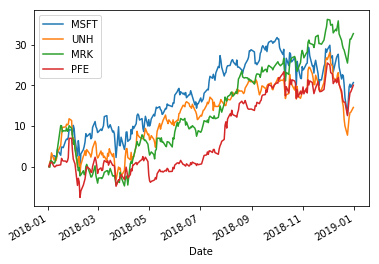

In [16]:
#графики для третьей из максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'MRK', 'PFE']].plot()

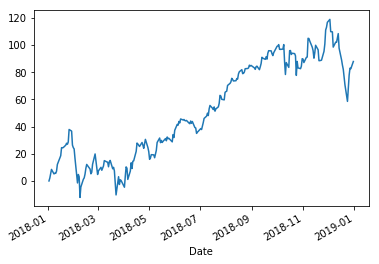

In [17]:
df_pct_sum_0[['MSFT', 'UNH', 'MRK', 'PFE']].sum(axis=1).plot()

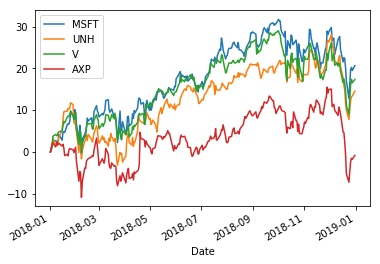

In [18]:
#графики для четвертой из максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'V', 'AXP']].plot()

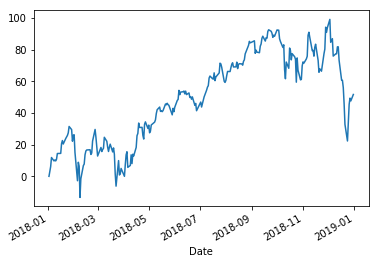

In [19]:
df_pct_sum_0[['MSFT', 'UNH', 'V', 'AXP']].sum(axis=1).plot()

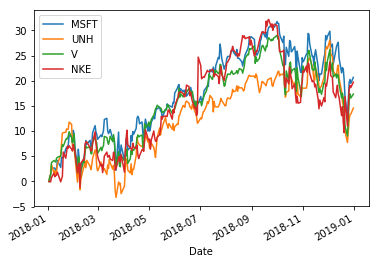

In [20]:
#графики для пятой из максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE']].plot()

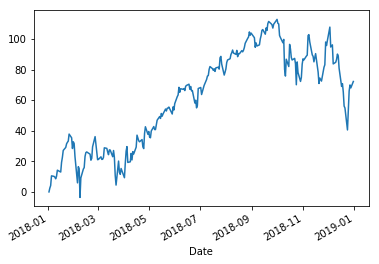

In [21]:
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE']].sum(axis=1).plot()

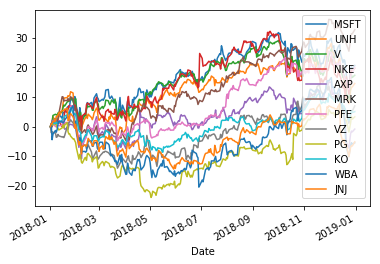

In [22]:
#Посмотрим что получается для уникальных компонент пяти максимальных клик на графиках
#Так как клики по отдельности клики схожи на графиках кумулятивных процентов, то можно 
#построить графики для уникальных компонет максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE', 'AXP','MRK', 'PFE', 'VZ', 'PG', 'KO', 'WBA', 'JNJ']].plot()

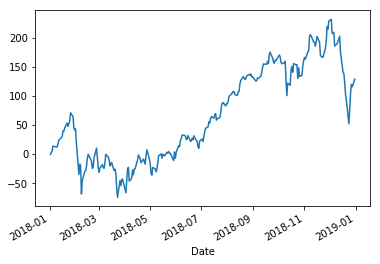

In [23]:
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE', 'AXP','MRK', 'PFE', 'VZ', 'PG', 'KO', 'WBA', 'JNJ']].sum(axis=1).plot()

In [24]:
df_pct_sum_0['sum_cliques']=df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE', 'AXP','MRK', 'PFE', 'VZ', 'PG', 'KO', 'WBA', 'JNJ']].sum(axis=1)

In [25]:
all_pct=df_pct_0[['MSFT', 'UNH', 'V', 'NKE', 'AXP','MRK', 'PFE', 'VZ', 'PG', 'KO', 'WBA', 'JNJ']]
all_pct.head()

,MSFT,UNH,V,NKE,AXP,MRK,PFE,VZ,PG,KO,WBA,JNJ
Date,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.004654,0.010490,0.009955,-0.000158,0.006165,-0.001423,0.007409,-0.020549,-0.001213,-0.002196,0.007472,0.009553
2018-01-04,0.008801,0.004340,0.003718,-0.000630,0.013059,0.016209,0.002179,0.003242,0.007069,0.014085,-0.051781,-0.000071
2018-01-05,0.012398,0.019069,0.023949,0.008512,0.002281,-0.001052,0.001903,-0.002281,0.000658,-0.000217,0.018436,0.008253
2018-01-08,0.001020,-0.017357,0.004038,0.008909,-0.009201,-0.005791,-0.011123,-0.001715,0.005261,-0.001519,0.012754,0.001270


In [26]:
#Построим график для риска подневно на протяжении всего периода
all_pct['mean'] = all_pct.mean(numeric_only=True, axis=1)
all_pct['sda'] = all_pct.std(numeric_only=True, axis=1)
all_pct['risk']=all_pct['mean']/all_pct['sda']
all_pct_0=all_pct.fillna(0)
all_pct_0.head()

C:\Users\Yana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Yana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,MSFT,UNH,V,NKE,AXP,MRK,PFE,VZ,PG,KO,WBA,JNJ,mean,sda,risk
Date,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.004654,0.010490,0.009955,-0.000158,0.006165,-0.001423,0.007409,-0.020549,-0.001213,-0.002196,0.007472,0.009553,0.002513,0.008295,0.303000
2018-01-04,0.008801,0.004340,0.003718,-0.000630,0.013059,0.016209,0.002179,0.003242,0.007069,0.014085,-0.051781,-0.000071,0.001685,0.016967,0.099312
2018-01-05,0.012398,0.019069,0.023949,0.008512,0.002281,-0.001052,0.001903,-0.002281,0.000658,-0.000217,0.018436,0.008253,0.007659,0.008578,0.892850
2018-01-08,0.001020,-0.017357,0.004038,0.008909,-0.009201,-0.005791,-0.011123,-0.001715,0.005261,-0.001519,0.012754,0.001270,-0.001121,0.008276,-0.135452


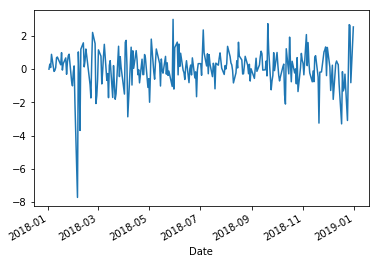

In [27]:
all_pct_0['risk'].plot()